In [360]:
def plot_arrfilled_arrnonfilled():
	mydb = connection.connect(host="localhost", port="3306", database="employee_hiring", user="root", passwd="Mini*9247")
	cursor = mydb.cursor()
	selectquery = "show tables"
	cursor.execute(selectquery)
	records = cursor.fetchall()
	tables = []
	for i in records:
		tables.append(i[0])
	tab = []
	for i in tables:
		tab.append(i[0:3])
	cursor = mydb.cursor()
	query = 'describe april_2014'
	cursor.execute(query)
	colu = cursor.fetchall()
	col = []
	for i in colu:
		col.append(i[0])
	df_all = dict()
	ctr=0
	for i in tab:
		query = 'select * from '+tables[ctr]+';'
		cursor.execute(query)
		df = pd.DataFrame(cursor.fetchall(),columns=col)
		df[df==''] = np.nan
		df_all[i]  = df.copy()
		ctr+=1
	per_yes = []
	per_no = []
	for i in df_all:
		df = df_all[i].copy()
		yes = df["Filled"].value_counts().sum()
		no = df["Filled"].isna().sum()
		per_yes.append((((yes)*100/(yes+no)).round(1)))
		per_no.append((((no)*100/(yes+no)).round(1)))
	per = pd.DataFrame(columns=["Filled","Non"],index=tab)
	per["Filled"] = per_yes
	per["Non"] = per_no
	ax = per.plot(kind="bar",rot=0)
	for i in ax.containers:
		ax.bar_label(i,fontsize="9")
	fig = ax.get_figure()
	fig.savefig("task1.png")
	arrFilledjobs = per_yes.copy()
	arrNonfilledjobs = per_no.copy()
	return arrFilledjobs, arrNonfilledjobs,per

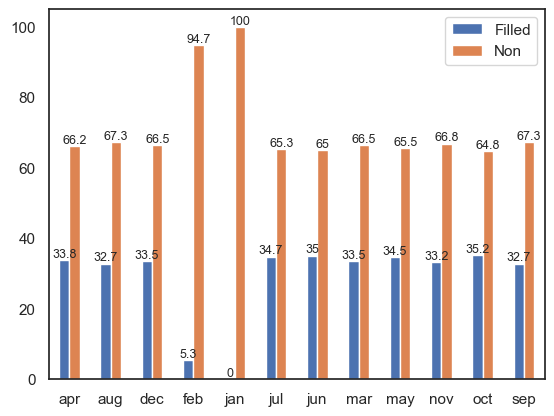

In [361]:
a,b,c = plot_arrfilled_arrnonfilled()

In [362]:
c

,Filled,Non
apr,33.8,66.2
aug,32.7,67.3
dec,33.5,66.5
feb,5.3,94.7
jan,0.0,100.0
jul,34.7,65.3
jun,35.0,65.0
mar,33.5,66.5
may,34.5,65.5
nov,33.2,66.8
